# One-Way ANOVA

In [140]:
# Import modules
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt


# Create dataframe from data from task
data = pd.DataFrame({
    "Non-gamer": [23, 24, 24, 26, 17],
    "Gamer": [19, 20, 16, 15, 17]
})

# Perform one-way ANOVA
F, p = f_oneway(data["Non-gamer"], data["Gamer"])

# Print results
print("F-statistic:", F)
print("p-value:", p)


F-statistic: 9.1125
p-value: 0.01659249029483741


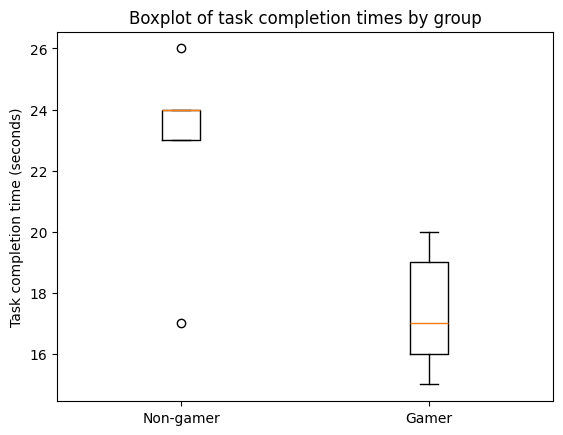

,Non-gamer,Gamer
count,5.000000,5.000000
mean,22.800000,17.400000
std,3.420526,2.073644
min,17.000000,15.000000
25%,23.000000,16.000000
50%,24.000000,17.000000
75%,24.000000,19.000000
max,26.000000,20.000000


In [141]:
# Create boxplot without data points
plt.boxplot(data, showfliers=True)

# Add labels and title
plt.xticks([1, 2], ["Non-gamer", "Gamer"])
plt.ylabel("Task completion time (seconds)")
plt.title("Boxplot of task completion times by group")

# Show plot
plt.show()
data.describe()



# Two-Way ANOVA

In [150]:
# Import modules
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import seaborn as sns

# Create long-form dataframe from data
data = pd.DataFrame({
    "Task": [1, 2, 3, 4, 5] * 10,
    "Time": [23, 21, 16, 17, 15, 24, 21, 20, 17, 14, 24, 20, 21, 15, 13, 26, 21, 20, 17, 16, 17, 18, 20, 15, 14, 19, 16, 15, 14, 15, 20, 16, 15, 13, 14, 16, 16, 14, 13, 11, 15, 15, 12, 14, 12, 17, 16, 13, 14, 12],
    "Group": ["Non-gamer"] * 25 + ["Gamer"] * 25
})

# Perform two-way ANOVA
model = ols("Time ~ C(Task) + C(Group) + C(Task):C(Group)", data=data).fit()
anova = anova_lm(model, type=2)

# Print results
print(anova)

                    df  sum_sq  mean_sq          F        PR(>F)
C(Task)            4.0  260.92    65.23  22.570934  8.230032e-10
C(Group)           1.0  192.08   192.08  66.463668  4.916444e-10
C(Task):C(Group)   4.0   30.92     7.73   2.674740  4.559714e-02
Residual          40.0  115.60     2.89        NaN           NaN


# Learning

/var/folders/5s/_68k3zsd12q1r1v36_nt1jsm0000gn/T/ipykernel_2539/369614431.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.




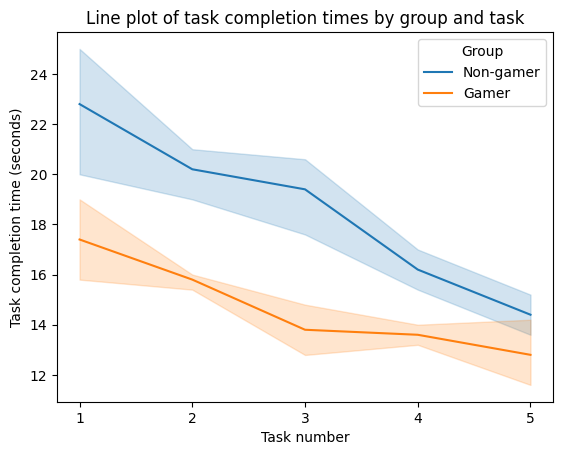

In [151]:
# Create line plot
sns.lineplot(x="Task", y="Time", hue="Group", data=data, ci=95)

# Add labels and title
plt.xlabel("Task number")
plt.xticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"])
plt.ylabel("Task completion time (seconds)")
plt.title("Line plot of task completion times by group and task")

# Show plot
plt.show()